In [1]:
from clusc import *

In [2]:
circos_chrom = dict(
    file='/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt',
    cytobands_file='/home/archer/Desktop/ClusC/examples/chromosome.band.hg19.txt',
    label=True,
    tick_unit=500000,
    tick_label='M',
    tick_length=0.1,
    tick_orientation='outside',
    radius=0.9,
    width=0.4,
    color=['red','orange','green','blue'],
    type='chrom')

circos_hic = dict(
    file='/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt',
    depth=100000,
    radius=0.7,
    width=1.2,
    color='RdYlBu',
    type='hic')

circos_clusters_bed  = dict(
    file='/home/archer/Desktop/ClusC/examples/clusters.bed',
    radius=0.5,
    width=0.2,
    color=['red','orange','green','blue'],
    type='highlight')

circos_clusters_signal  = dict(
    file='/home/archer/Desktop/ClusC/examples/clusters_1.bed',
    radius=0.6,
    width=0.4,
    #color=['red','orange','green','blue'],
    type='bar')

circos_clusters_links  = dict(
    file='/home/archer/Desktop/ClusC/examples/results/clusters.links',
    radius=0.45,
    color='RdYlBu',
    type='link')

circos_configs = {}
circos_configs[0] = circos_chrom
circos_configs[1] = circos_clusters_bed
circos_configs[2] = circos_clusters_signal
circos_configs[3] = circos_clusters_links
circos_configs[4] = circos_hic

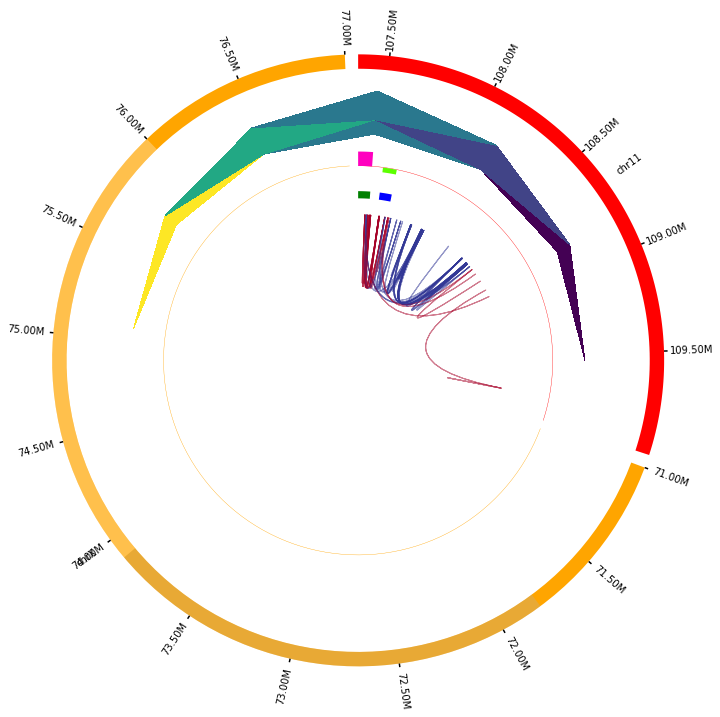

In [4]:
import itertools
plotting_circos(circos_configs, '/home/archer/Desktop/ClusC/examples/results/plotting_circos.png')

In [6]:
tmp_pd = pd.read_csv('/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt', sep="\t", names=['chrom','start','end'])

In [7]:
tmp_pd

,chrom,start,end
0,chr11,107356000,109980000
1,chrX,71000000,77000000


In [9]:
tmp_pd1 = tmp_pd.copy(deep=True)
tmp_pd1['score'] = [1,2]
tmp_pd1.loc[0,'start']=71000000
tmp_pd1.loc[1,'chrom']='chr1'
tmp_pd1

,chrom,start,end,score
0,chr11,71000000,109980000,1
1,chr1,71000000,77000000,2


In [13]:
for index, row in tmp_pd1.iterrows():
    tmp = get_valid_region(tmp_pd, row)
    if tmp is None:
        print("kk")
    else:
        rr=tmp['chrom'],tmp['start'],tmp['end']
        tmp_pd1.loc[index,:]=tmp
        print(tmp)
    

chrom        chr11
start    107356000
end      109980000
score            1
Name: 0, dtype: object
kk


In [14]:
tmp_pd1

,chrom,start,end,score
0,chr11,107356000,109980000,1
1,chr1,71000000,77000000,2


,chrom,start,end
0,chr11,107356000.0,109980000.0
1,None,NaN,NaN


In [46]:
tmp_pd1.loc[0] = row
tmp_pd1

,chrom,start,end
0,None,NaN,NaN
1,chrX,71000000.0,77000000.0


In [4]:
tmp_pd = pd.read_csv(circos_configs[3].get('file'), sep="\t", names=['chrom1','start1','end1','chrom2','start2','end2','score'])

In [5]:
tmp_pd

,chrom1,start1,end1,chrom2,start2,end2,score
0,chr11,107420079,107420251,chr11,107447344,107447466,3
1,chr11,107420079,107420251,chr11,107469353,107469593,3
2,chr11,107420079,107420251,chr11,107475840,107476080,3
3,chr11,107420079,107420251,chr11,107641806,107642046,3
4,chr11,107420079,107420251,chr11,108911117,108911357,3
...,...,...,...,...,...,...,...
135,chr11,108841381,108841621,chr11,109808811,109809051,3
136,chr11,108911117,108911357,chr11,107420079,107420251,3
137,chr11,109808811,109809051,chr11,108841381,108841621,3
138,chr11,109808811,109809051,chr11,109810040,109810193,3


In [13]:
 tmp_pd_1 = pd.DataFrame(row.loc[['chrom1','start1','end1']]).rename({'chrom1':'chrom','start1':'start','end1':'end'})

In [14]:
tmp_pd_1

,0
chrom,chr11
start,107420079
end,107420251


In [13]:
cumlen = [0] + list(chrom_regions['length'].cumsum())[:-1]
cumlen

[0, 2484000]

In [10]:
chrom_regions[2]-chrom_regions[1]

0      2484000
1    155270560
dtype: int64

In [9]:
matrix_c.shape[0]

5

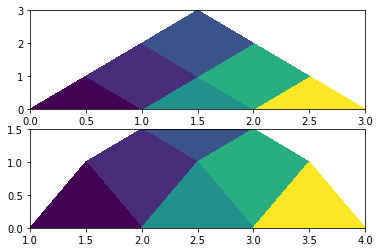

In [27]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 1)
matrix_c=np.array([[1,2,3],[4,5,6],[7,8,9]])
n = matrix_c.shape[0]
t = np.array([[1,0.5],[-1,0.5]])
A = np.dot(np.array([(i[1],i[0]) for i in itertools.product(range(n,-1,-1),range(0,n+1,1))]),t)
X = A[:,1].reshape(n+1,n+1)
Y = A[:,0].reshape(n+1,n+1)
Y[Y<0]=0
axs[0].pcolormesh(X,Y,np.flipud(matrix_c))


test = [4,3,2,1]
B = np.dot(np.array([(i[1],i[0]) for i in itertools.product(test[::-1],test)]),t)
x = B[:,1].reshape(n+1,n+1)
y = B[:,0].reshape(n+1,n+1)
y[y<0]=0
y[y>1.5]=1.5
axs[1].pcolormesh(x,y,np.fliplr(matrix_c))

In [13]:
X

array([[1. , 1.5, 2. ],
       [0.5, 1. , 1.5],
       [0. , 0.5, 1. ]])

In [17]:
x=X
y=Y
y[y<0]=0

In [12]:
Y

array([[-2., -1.,  0.],
       [-1.,  0.,  1.],
       [ 0.,  1.,  2.]])

In [15]:
np.flipud(matrix_c)

array([[3, 4],
       [1, 2]])

In [15]:
b[b<0]=0

In [16]:
b

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 2.],
       [0., 0., 1., 2., 3.],
       [0., 1., 2., 3., 4.]])

In [14]:
A[:,0].reshape(n+1,n+1)

array([[-4., -3., -2., -1.,  0.],
       [-3., -2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.,  2.],
       [-1.,  0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.,  4.]])

In [25]:
n=5
t = np.array([[1,0.5],[-1,0.5]])
test = [3,4,5,6,7]
np.dot(np.array([(i[1],i[0]) for i in itertools.product(test[::-1],test)]),t)

array([[-4. ,  5. ],
       [-3. ,  5.5],
       [-2. ,  6. ],
       [-1. ,  6.5],
       [ 0. ,  7. ],
       [-3. ,  4.5],
       [-2. ,  5. ],
       [-1. ,  5.5],
       [ 0. ,  6. ],
       [ 1. ,  6.5],
       [-2. ,  4. ],
       [-1. ,  4.5],
       [ 0. ,  5. ],
       [ 1. ,  5.5],
       [ 2. ,  6. ],
       [-1. ,  3.5],
       [ 0. ,  4. ],
       [ 1. ,  4.5],
       [ 2. ,  5. ],
       [ 3. ,  5.5],
       [ 0. ,  3. ],
       [ 1. ,  3.5],
       [ 2. ,  4. ],
       [ 3. ,  4.5],
       [ 4. ,  5. ]])

In [26]:
n=5
t = np.array([[1,0.5],[-1,0.5]])
np.dot(np.array([(i[1],i[0]) for i in itertools.product(range(n,-1,-1),range(0,n+1,1))]),t)

array([[-5. ,  2.5],
       [-4. ,  3. ],
       [-3. ,  3.5],
       [-2. ,  4. ],
       [-1. ,  4.5],
       [ 0. ,  5. ],
       [-4. ,  2. ],
       [-3. ,  2.5],
       [-2. ,  3. ],
       [-1. ,  3.5],
       [ 0. ,  4. ],
       [ 1. ,  4.5],
       [-3. ,  1.5],
       [-2. ,  2. ],
       [-1. ,  2.5],
       [ 0. ,  3. ],
       [ 1. ,  3.5],
       [ 2. ,  4. ],
       [-2. ,  1. ],
       [-1. ,  1.5],
       [ 0. ,  2. ],
       [ 1. ,  2.5],
       [ 2. ,  3. ],
       [ 3. ,  3.5],
       [-1. ,  0.5],
       [ 0. ,  1. ],
       [ 1. ,  1.5],
       [ 2. ,  2. ],
       [ 3. ,  2.5],
       [ 4. ,  3. ],
       [ 0. ,  0. ],
       [ 1. ,  0.5],
       [ 2. ,  1. ],
       [ 3. ,  1.5],
       [ 4. ,  2. ],
       [ 5. ,  2.5]])

In [ ]:
chr_region=tmp1

In [2]:
chr_region='chr11',107356000,109840000
get_hic_matrix('/home/archer/Desktop/ClusC/examples/datasets/Rao2014-K562-MboI-allreps-filtered.1kb.chr11.cool',
    chr_region)

array([[4.14813289, 0.        , 3.28626464, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.6253496 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.28626464, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        6.91690844],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 6.91690844, 0.        ,
        1.6693657 ]])

In [18]:
hic_data.matrix(balance=True, sparse=True).fetch(('chr11',107356000,107357001)).toarray()

array([[4.14813289, 0.        ],
       [0.        , 6.6253496 ]])